In [1]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact
from os import path

import plotly.graph_objects as go
import pandas as pd

from quimb import *
import time


In [3]:
def Hilbertspace_Zr(N,r):

    states=np.zeros((r**N,N),dtype=int)

    if N>0:
        for i_1 in range(r**N):
            num_str=np.base_repr(i_1,base=r)[::-1]
            for i_2 in range(len(num_str)):
                states[i_1,i_2]=int(num_str[i_2])
    else:
        states=[[0]]
        
    return states

def p_transpose_2(V,Na,Nb):
# partial transpose with respect to subsystem 2
# the basis of NaxNb density matrix is defined by Nb*(i-1)+j,
# i,j=1,2,3 spans the Hilbert space of subsystem 1 and 2 respectively
    U=np.zeros((Na*Nb,Na*Nb), dtype=np.complex128)
    for i_1 in range(Na):
        for i_2 in range(Na):
#             print(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)].shape)
            U[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)]=np.transpose(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)])

    return U

def vNent_calc(rho,epsilon=1e-9):
    chi0 =np.linalg.eigvalsh(rho)
    chi1=chi0[np.nonzero(np.abs(chi0)>epsilon)]
    chi2=chi1[np.nonzero(np.abs(chi1-1)>epsilon)]
    return -np.sum(chi2*np.log(chi2))


ES was loaded!
ES was loaded!
ES was loaded!
ES was loaded!
ES was loaded!


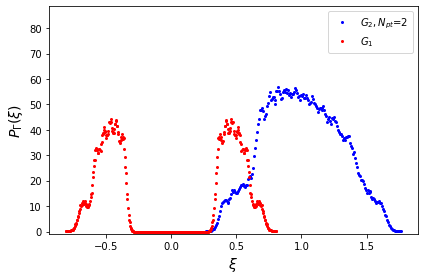

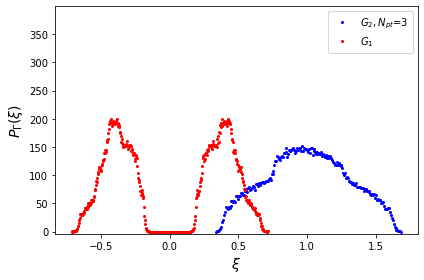

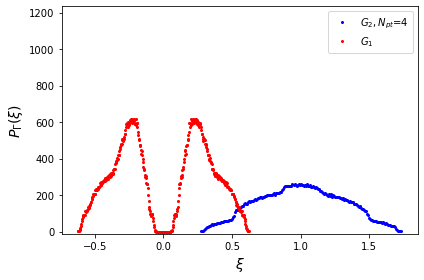

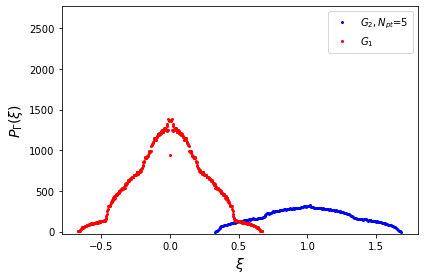

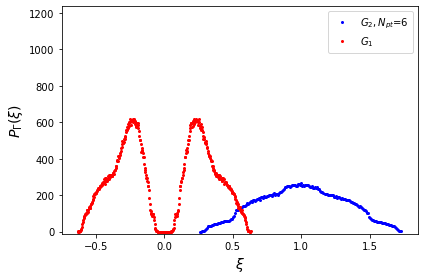

In [22]:
out_dir = 'data/' 
r=2 # local Hilbert space dim
symm=1

La=5
Lb=5
Na=r**La
Nb=r**Lb

Lc=12

s_ab=Hilbertspace_Zr(La+Lb,r)
i_ab=[]
### indices for occupation numbers
for i_r in range(La+Lb+1):
    i_ab.append(np.argwhere(np.sum(s_ab,axis=1)==i_r)[:,0])

s_c=Hilbertspace_Zr(Lc,r)
i_c=[]
for i_r in range(Lc+1):
    i_c.append(np.argwhere(np.sum(s_c,axis=1)==i_r)[:,0])        

Npt = int((La+Lb+Lc)/2)
# Npt_ab_list = np.arange(max(Npt-Lc,1),int((La+Lb))+1)
Npt_ab_list=np.arange(2,7)

def semicirc_dist(N,Q,x,x0):
    # my Q is from Ludwig's paper
    R= 2*sqrt(Q)
    fx= 2/(pi*R**2)*(R**2-(x-x0)**2+0j)**0.5
    return fx

for i_pt in Npt_ab_list:
    plt.figure(figsize=(6,4))
    
    out_dir = 'data/' 
    if symm==1:
        f1= 'NS_proj_decomp_U1_%d_%d_Labc_%d_%d_%d_symm.npz' % (Npt,i_pt,La,Lb,Lc)
    else:
        f1= 'NS_proj_decomp_U1_%d_%d_Labc_%d_%d_%d.npz' % (Npt,i_pt,La,Lb,Lc)
    fname = out_dir+f1

    npzfile = np.load(fname)
    vT=npzfile['evals']
    v1T=npzfile['evals1']
    v2T=npzfile['evals2']
    Nrep=npzfile['Nrep']
    print('ES was loaded!')
    

    num_bins = 200
#     n, bin_edges = np.histogram(vT, bins=num_bins)
#     bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# #     N0=np.sum(n)/Nrep
# #     print("total is ", N0)
#     n= n/Nrep/(bin_edges[1]-bin_edges[0])            
#     plt.plot(bins_center,n,'v',markersize=4,color='C%d' % (i_pt-1), label='$N_{ab}$=%d' % (i_pt))

        
    Nab_r = len(i_ab[i_pt]) # size of sub-Hilbert space
    n, bin_edges = np.histogram(v1T, bins=num_bins)
    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
#     print(np.sum(n)/Nrep-Nab_r-N0)
    n= n/Nrep/(bin_edges[1]-bin_edges[0])            
    plt.plot(bins_center,n,'o',markersize=2,color='b' , label=r'$G_2, N_{pt}$=%d' % (i_pt))

    num_bins = 400
    n, bin_edges = np.histogram(v2T, bins=num_bins)
    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    n= n/Nrep/(bin_edges[1]-bin_edges[0])            
    plt.plot(bins_center,n,'o',markersize=2,color='r', label=r'$G_1$')

    ymax=np.sort(n)[-3]*2
    plt.legend()
    plt.ylim(-ymax/100,ymax)

    
#     xplot=np.linspace(-1.9,2.9,1000)
#     xplot=np.linspace(-1.1,3.1,1000)
#     if symm==1:
#         fx1= semicirc_dist(Nab_r/r,Na*Nb/r**(Lc+1),xplot,0)*(r-1)/r
#         fx2= semicirc_dist(Nab_r/r,Na*Nb/r**(Lc+1),xplot,1)/r
#         plt.plot(xplot,np.real(fx1+fx2),color='C%d' % (i_l))
#     else:
#         fx= semicirc_dist(Nab_r,Na*Nb/r**Lc,xplot,1)
#         plt.plot(xplot,np.real(fx),color='C%d' % (i_l))

    lw=0.2

# plt.plot( [0,0],[0,ymax],'k--',linewidth=lw)
# plt.xscale("log")
# plt.yscale("log")
    # plt.xlim(-10,10)
    # plt.yticks(np.arange(0.,ymax+0.1,0.5))
    # plt.legend()
    fsize=14
    if symm==1:
        plt.ylabel(r'$P_\Gamma(\xi)$',fontsize = fsize)
        plt.xlabel(r"$\xi$",fontsize = fsize)
    else:
        plt.ylabel(r'$P_\Gamma(\xi)$',fontsize = fsize)
        plt.xlabel(r"$ \xi$",fontsize = fsize)

    plt.tight_layout()
# if symm==1:
#     plt.savefig('figs/NS_r_%d_LA_%d_symm.pdf' % (r,La+Lb))
# else:
#     plt.savefig('figs/NS_r_%d_LA_%d.pdf' % (r,La+Lb))
plt.show()